## <u><b><i><center>Capstone Project on CAR DETAILS PREDICTION - By Patricia S</u></b></i></center>

### <u>Problem Statement:
Perform EDA and derive Insights from the CAR DETAILS
dataset using Various Data Analysis and Data Visualization
libraries of Python such as Pandas, Matplotlib & Seaborn.
Create and Deploy a ML Model Which can be accessed by all,
using Streamlit and GitHub.

### <u>About the Dataset:

This data is collected from 'Car Dekho'. <br>
Following details of cars are included in the dataset:
1) Car name <br>
2) Year <br>
3) Selling Price <br>
4) Kms driven <br>
5) Fuel <br>
6) Seller type <br>
7) Transmission <br>
8) Owner <br>

#### Link to the Kaggle Dataset(Car Details):https://www.kaggle.com/datasets/akshaydattatraykhare/car-details-dataset

### <u>DATA PREPARATION

In [1]:
import numpy as np              # numpy is aliased as np and it deals with data
import pandas as pd             # pandas is aliased as pd and it deals with data
import matplotlib.pyplot as plt # pyplot is aliased as plt and it deals with graphic charts
import seaborn as sns           # seaborn is aliased as sns and it deals with graphic charts
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df_car = pd.read_csv('Car_Details.csv')
print(type(df_car))
df_car

<class 'pandas.core.frame.DataFrame'>


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


### <u>Scrubbing the Data

In [3]:
df_car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df_car.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [5]:
# Displaying the column names
df_car.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [6]:
# To know the size of the data and the number of rows and columns
df_car.shape

# 4340 - rows
# 8 - columns

(4340, 8)

In [7]:
# Displaying the column types
df_car.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

#### To know more information about the data

In [8]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [9]:
# Extracting Numerical and Categorical columns
cat_cols = df_car.select_dtypes(include=['object'])
print(cat_cols.columns)
num_cols = df_car.select_dtypes(exclude=['O'])
print(num_cols.columns)

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Index(['year', 'selling_price', 'km_driven'], dtype='object')


#### Univariate Statistical Analysis

In [10]:
df_car.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [11]:
df_car.describe(percentiles = [0.05, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99]).T

,count,mean,std,min,5%,50%,90%,95%,96%,97%,98%,99%,max
year,4340.0,2013.090783,4.215344,1992.0,2005.0,2014.0,2018.0,2019.0,2019.0,2019.0,2019.0,2020.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,80000.0,350000.0,900000.0,1300000.0,1479400.0,1720750.0,2492200.0,3200000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,10000.0,60000.0,120000.0,140000.0,150000.0,163830.0,186000.0,220000.0,806599.0


#### Inference :-
The dataset has 4340 observations and 8 columns.<br>
Average km driven and selling price is about 66215 and 504127 respectively.<br>
Oldest car is of year 1992 and the most recent is of year 2020.

### <u>DATA CLEANING AND PREPROCESSING

In [12]:
# Check for duplicate values
df_car.duplicated().sum()

763

In [13]:
# View the duplicate values
df_car[df_car.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [14]:
# Dropping the duplicate values
df_car.drop_duplicates(inplace=True)

In [15]:
df_car.shape

(3577, 8)

In [16]:
# Checking for null values
df_car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [17]:
# Checking for unique values
df_car.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

In [18]:
print(df_car.name.unique())

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']


In [19]:
print(sorted(df_car.year.unique()))

[1992, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [20]:
print(df_car.fuel.unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [21]:
print(df_car.seller_type.unique())

['Individual' 'Dealer' 'Trustmark Dealer']


In [22]:
print(df_car.transmission.unique())

['Manual' 'Automatic']


In [23]:
print(df_car.owner.unique())

['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [24]:
print(df_car.selling_price.unique())

[  60000  135000  600000  250000  450000  140000  550000  240000  850000
  365000  260000 1650000  585000 1195000  390000 1964999 1425000  975000
 1190000  930000  525000 1735000 1375000  900000 1300000 1400000  229999
 1550000 1250000  625000 1050000  560000  290000  275000  411000  150000
  500000  100000  725000  401000  750000  310000  665000  465000  160000
  675000  300000   70000  151000  280000  350000  570000  125000  130000
  925000  200000  248000   80000  650000  495000  371000 1025000 8150000
  325000 1470000 2800000  210000 1150000 4500000 2750000 1975000  175000
 2500000  628000  399000  315000  780000  434000  690000  555000  120000
  165000   95000  800000  840000  490000  400000 1000000  530000   40000
   75000  540000  700000  430000   65000  195000  170000  225000   99000
  620000 2550000  320000  810000  282000   72000  640000  380000 1500000
  434999  190000 2900000  425000  265000  890000  685000  940000  590000
  385000 2000000  235000   52000   89999  180000  2

In [25]:
print(df_car.km_driven.unique())

[ 70000  50000 100000  46000 141000 125000  25000  60000  78000  35000
  24000   5000  33000  28000  59000   4500 175900  14500  15000  33800
 130400  80000  10000 119000  75800  40000  74000  64000 120000  79000
  18500  10200  29000  90000  73300  92000  66764 350000 230000  31000
  39000 166000 110000  54000  63000  76000  11958  20000   9000   6500
  58000  62200  34000  53000  49000  63500   9800  13000  21000  29173
  48000  30000  87000  16000  79350  81000   3600  14272  49213  57000
   3240 114000  53772 140000 175000  36000 155500  23000  22155  78380
 150000  80362  55000   1136  43000   2650 115962  65000  56000 213000
 139000 160000 163000  32000  52000  11240  66000  26500  72000  44000
 130000 195000 155000   4000  41000  10832  14681  51000 200000  19600
  46730  21170 167223 141440 212814  88635 149674   8000  68000  38000
  75000  98000  81925  82080  97000  52047  62009  33100 220000  45000
 180000  22000  80577 127500  40903  22288  61690  64484  75976  85962
  5703

#### Featuring the Traget variable.

In [26]:
df_car['selling_price']

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 3577, dtype: int64

In [27]:
df_car.selling_price.value_counts()

300000     137
250000     112
350000     106
500000      87
600000      84
          ... 
2595000      1
368000       1
248000       1
641000       1
865000       1
Name: selling_price, Length: 445, dtype: int64

## 📊 <u>Data Visualization

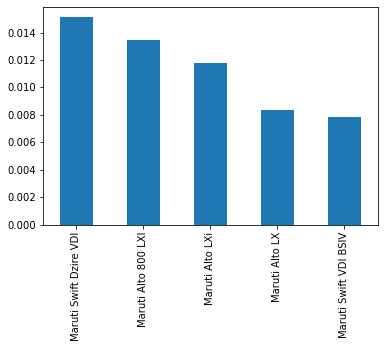

In [28]:
# We use (value_counts) to know to know the sold numbers of each car use (plot) to draw the graph
df_car["name"].value_counts(normalize = True)[:5].plot(kind = 'bar')
plt.show()

In [29]:
# creating a new column 'brand' using the name of the car
df_car['brand'] = df_car['name'].apply(lambda x:x.split()[0])
# checking the unique values of the brand and showing the first 5 rows of brand column
print(df_car['brand'].nunique())
print(df_car['brand'].unique())
print(df_car['brand'].head())

29
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']
0     Maruti
1     Maruti
2    Hyundai
3     Datsun
4      Honda
Name: brand, dtype: object


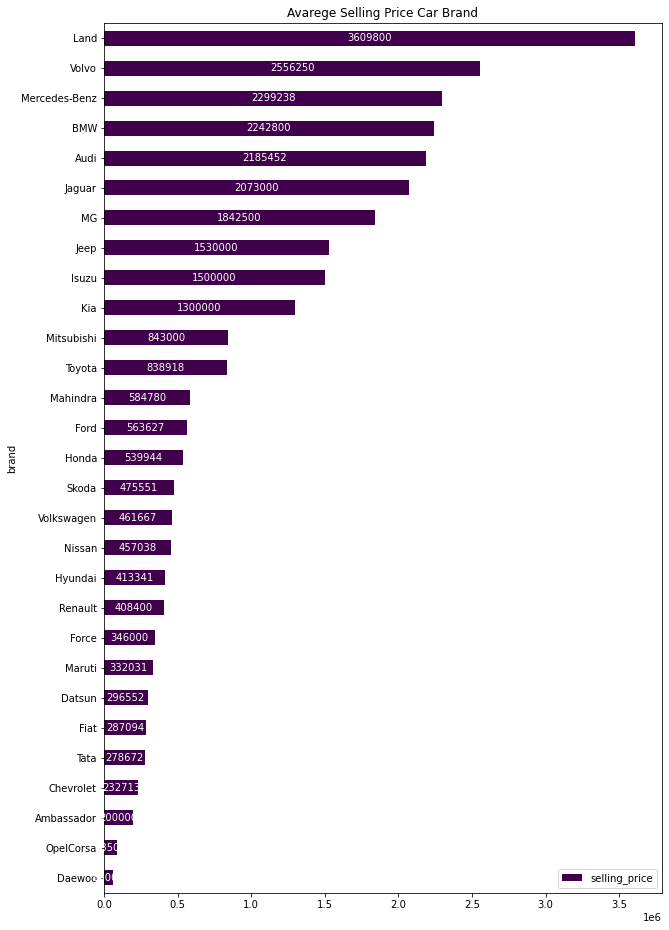

In [30]:
# We use groupby and mean to extract values and plot to draw the graph
price = df_car.groupby(['brand'])[['selling_price']].mean()
price.sort_values(by='selling_price', ascending=True, inplace=True)
ax   = price.plot(kind='barh', cmap='PRGn' , figsize=(10,16) ,title= 'Avarege Selling Price Car Brand')
for c in ax.containers:
        # set the bar label
    ax.bar_label(c, fmt='%.0f',label_type='center', color='w',rotation=0)

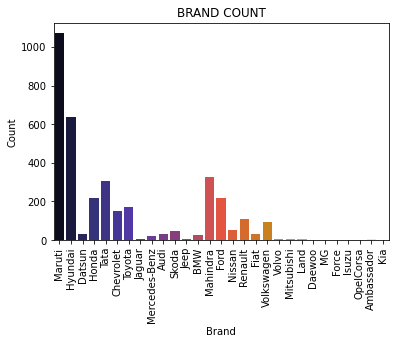

In [31]:
sns.countplot(data=df_car,x="brand",palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Brand",fontsize=10,color="black")
plt.ylabel("Count",fontsize=10,color="black")
plt.title("BRAND COUNT",color="black")
plt.show()

##### The most common car model is the Maruti.

INFORMATION: Maruti Suzuki India Limited, formerly known as Maruti Udyog Limited, is an Indian automobile manufacturer, based in New Delhi.

#### <u>Distribution Plots (Year - KM_Driven - Selling_Price)

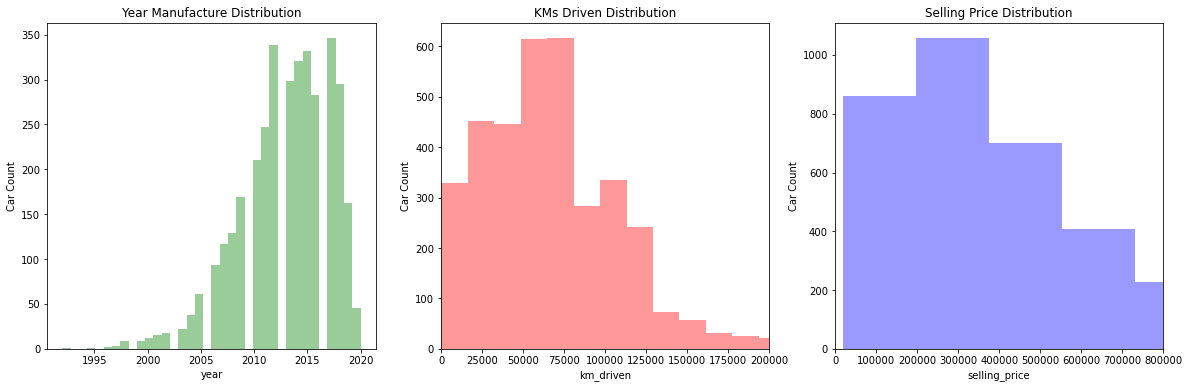

In [32]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(20, 6))

# Graph for Car Manufacturing Year
sns.distplot(df_car['year'], kde=False, color="g", ax=axes[0]).set_title('Year Manufacture Distribution')
axes[0].set_ylabel('Car Count')

# Graph for KMs Driven by Car
sns.distplot(df_car['km_driven'], kde=False, color="r", ax=axes[1]).set_title('KMs Driven Distribution')
axes[1].set_ylabel('Car Count')
axes[1].set_xlim([0,200000])

# Graph for Selling Price of the Car
sns.distplot(df_car['selling_price'], kde=False, color="b", ax=axes[2]).set_title('Selling Price Distribution')
axes[2].set_ylabel('Car Count')
axes[2].set_xlim([0,800000])

plt.show()

#### Summary:
Year - There is a huge spike for cars manufactured between 2011 to 2018.<br>
KMs Driven - There is a unimodal distrubtion of km driven with the largest spike in between 50000 to 75000 kms.<br>
Selling Price - There is another unimodal distribution of selling price with the largest spike between 250000 to 400000.<br>
The km driven and selling price graphs both share a similar distribution.

#### <u>Scatter Plot of Selling Price and KMs Driven

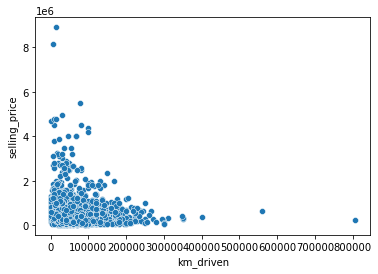

In [33]:
sns.scatterplot(x=df_car['km_driven'], y = df_car['selling_price'])
plt.show()

#### <u>Graph to view sales classified by fuel

In [34]:
df_car.fuel.value_counts()

Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64

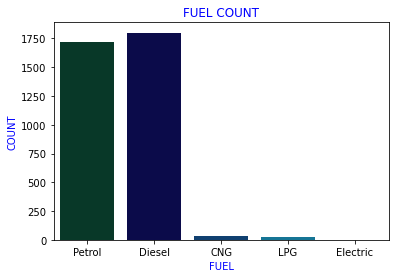

In [35]:
sns.countplot(data=df_car,x="fuel",palette="ocean")
plt.xlabel("FUEL",fontsize=10,color="blue")
plt.ylabel("COUNT",fontsize=10,color="blue")
plt.title("FUEL COUNT",color="b")
plt.show()

#### <u>Histogram distribution of Manual and Automatic cars by years.

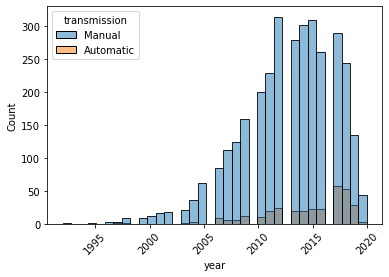

In [36]:
sns.histplot(data=df_car, x="year", hue="transmission")
plt.xticks(rotation=45)
plt.show()

#### <u>Violin graph showing the distribution of Manual and Automatic cars by years.

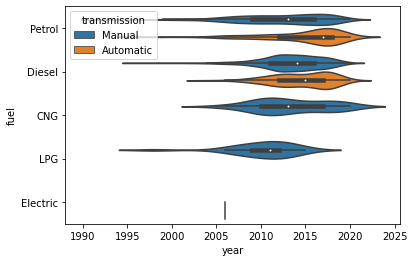

In [37]:
sns.violinplot(data=df_car, x="year", y="fuel",hue="transmission")
plt.show()

#### <u>The relationship between km_driven and price

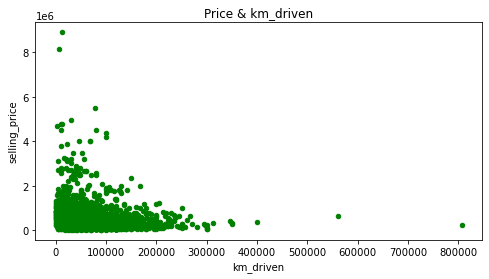

In [38]:
#We will display bar graphs scatter
df_car.plot(x="km_driven", y="selling_price", kind="scatter", figsize=(8, 4), title="Price & km_driven", color="green");

#### <u>The relationship between km_driven and year

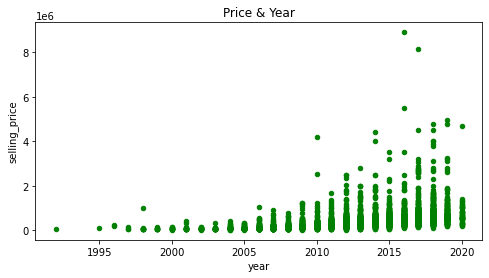

In [39]:
#We will display bar graphs scatter
df_car.plot(x="year", y="selling_price", kind="scatter", figsize=(8, 4), title="Price & Year", color="green");

#### <u>Selling Price vs Fuel

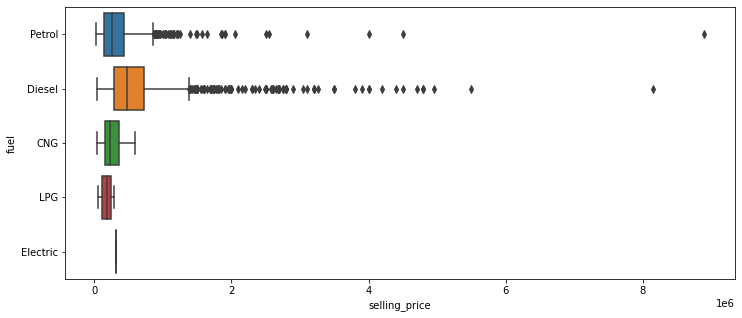

In [40]:
plt.figure(figsize=(12,5))
sns.boxplot(y='fuel', x = 'selling_price', data = df_car)
plt.show()

#### Inference :-
Petrol and Diesel cars are both have similar selling price with petrol cars are ahead.<br>
Diesel cars have high selling price compared to petrol cars.<br>
CNG, LPG and Electric cars are much cheaper in the old cars market.

#### <u>Selling Price vs Seller Type

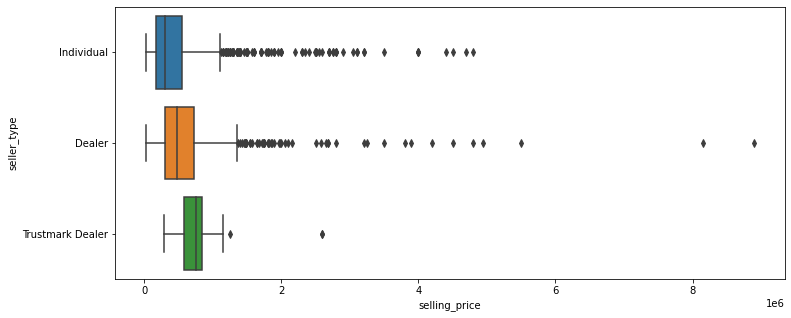

In [41]:
plt.figure(figsize=(12,5))
sns.boxplot(y='seller_type', x = 'selling_price', data = df_car)
plt.show()

#### Inference :-
Trustmark dealer have significatly lowest selling price.<br>
Dealers average selling price is more than the Individual selling price.

#### <u>Selling Price vs Transmission

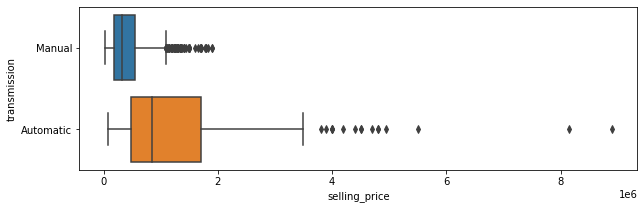

In [42]:
plt.figure(figsize=(10,3))
sns.boxplot(y='transmission', x = 'selling_price', data = df_car)
plt.show()

#### Inference :-
Automatic cars are more expensive than the manual cars.

#### <u>Selling Price vs Owner

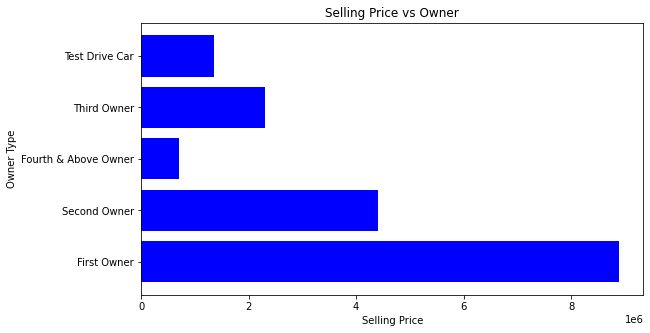

In [43]:
plt.figure(figsize=(9,5))
plt.barh(df_car['owner'], df_car['selling_price'], color = 'blue')
plt.title('Selling Price vs Owner')
plt.xlabel('Selling Price')
plt.ylabel('Owner Type')
plt.show()

#### Inference :-
First owner cars have the highest selling price followed by Second owner.<br>
Fourth & Above owner cars significantly have the lowest selling price.<br>
Although Test Drive car price is even higher than the fourth & above owner.

## <u>Modeling the Data

#### Extracting non-numeric columns and converting into numeric columns by Label Encoder

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns = ['fuel','seller_type','transmission','owner']
for col in columns:
  df_car[col] = le.fit_transform(df_car[col])

df_car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,Honda


### <u>Selecting the Dependent and Independent Features

In [45]:
x = df_car.drop(['selling_price','name','brand'],axis=1)
y = df_car['selling_price']

print(type(x))
print(type(y))

print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3577, 6)
(3577,)


### <u>Splitting the data into train and test data

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(2682, 6)
(895, 6)
(2682,)
(895,)


### <u>Creating function to evaluate the Regression Evaluation Metrics

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
# Function for Regression Evaluation Metrics

def reg_eval_metrics(ytest, ypred):
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)

def mscore(model):
    print('Training Score',model.score(x_train,y_train)) # Trainng R2 score
    print('Testing Score',model.score(x_test,y_test))    # Testing R2 Score

#### Importing ML Regression Libraries

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor



#### 1) Linear Regression

In [50]:
# Create the Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

# Computing Training and Testing score
mscore(lin_reg)

# Generating Prediction
ypred_lr = lin_reg.predict(x_test)
ypred_lr

# Evaluating the model 
reg_eval_metrics(y_test,ypred_lr)

# Evaluating Model : R2 score
r2_lr = r2_score(y_test,ypred_lr)*100
r2_lr

Training Score 0.4366509063817785
Testing Score 0.40116798367200357
MAE: 220363.98718721207
MSE: 222443749130.57748
RMSE: 471639.4270314744


40.11679836720036

#### 2)Random Forest

In [51]:
# Create the RandomForest Regression Model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

# Computing Training and Testing score
mscore(rf)

# Generating Prediction
ypred_rf = rf.predict(x_test)
ypred_rf

# Evaluating the model 
reg_eval_metrics(y_test,ypred_rf)

# Evaluating Model : R2 score
r2_rf = r2_score(y_test,ypred_rf)*100
r2_rf

Training Score 0.8683436690403197
Testing Score 0.4466876715124031
MAE: 198216.81052695718
MSE: 205534883628.4264
RMSE: 453359.55226335133


44.66876715124031

#### 3)Knn Regression

In [52]:
# Create the KNeighbors Regression Model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

# Compute Training and Testing score
mscore(knn)

# Generating Prediction
ypred_knn = knn.predict(x_test)
ypred_knn

# Evaluating the model 
reg_eval_metrics(y_test,ypred_knn)

# Evaluating Model : R2 score
r2_knn = r2_score(y_test,ypred_knn)*100
r2_knn

Training Score 0.4508168249567166
Testing Score 0.12642398810829114
MAE: 260281.3769832402
MSE: 324500891631.1758
RMSE: 569649.7973590229


12.642398810829114

#### 4)Decision Tree Regression

In [53]:
# Create the DecisionTree Regression Model
dt = DecisionTreeRegressor(criterion='absolute_error')
dt.fit(x_train,y_train)

# Compute Training and Testing score
mscore(dt)

# Generating Prediction
ypred_dt = dt.predict(x_test)
ypred_dt

# Evaluating the model 
reg_eval_metrics(y_test,ypred_dt)

# Evaluating Model : R2 score
r2_dt = r2_score(y_test,ypred_dt)*100
r2_dt

Training Score 0.9346800296015875
Testing Score 0.2999028546081606
MAE: 228697.65754189945
MSE: 260059965950.9137
RMSE: 509960.7494218684


29.990285460816057

#### 5)Gradient Boosting Regression

In [54]:
# Create the GradientBoosting Regression Model
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

# Compute Training and Testing score
mscore(gbr)

# Generating Prediction
ypred_gbr = gbr.predict(x_test)
ypred_gbr

# Evaluating the model 
reg_eval_metrics(y_test,ypred_gbr)

# Evaluating Model : R2 score
r2_gbr = r2_score(y_test,ypred_gbr)*100
r2_gbr

Training Score 0.6656979939424308
Testing Score 0.4873804660685934
MAE: 184134.62741852948
MSE: 190419028869.71658
RMSE: 436370.28871099435


48.73804660685934

#### 6)Ridge 

In [55]:
# Create the Ridge Regression Model
ridge = Ridge(alpha=10)
ridge.fit(x_train,y_train)

# Compute Training and Testing score
mscore(ridge)

# Generating Prediction
ypred_ridge = ridge.predict(x_test)
ypred_ridge

# Evaluating the model 
reg_eval_metrics(y_test,ypred_ridge)

# Evaluating Model : R2 score
r2_ridge = r2_score(y_test,ypred_ridge)*100
r2_ridge

Training Score 0.43627054092427364
Testing Score 0.3969804024696515
MAE: 220124.47432539557
MSE: 223999279291.0252
RMSE: 473285.62125953624


39.69804024696515

#### 7)Lasso 

In [56]:
# Create the Lasso Regression Model
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)

# Compute Training and Testing score
mscore(lasso)

# Generating Prediction
ypred_lasso = lasso.predict(x_test)
ypred_lasso

# Evaluating the model 
reg_eval_metrics(y_test,ypred_lasso)

# Evaluating Model : R2 score
r2_lasso = r2_score(y_test,ypred_lasso)*100
r2_lasso

Training Score 0.4366509063809708
Testing Score 0.4011678116596855
MAE: 220363.96770662168
MSE: 222443813026.73514
RMSE: 471639.4947698243


40.116781165968554

#### 8)XGBoost

In [57]:
# Create the XGBoost Regression Model
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

# Compute Training and Testing score
mscore(xgb)

# Generating Prediction
ypred_xgb = xgb.predict(x_test)
ypred_xgb

# Evaluating the model 
reg_eval_metrics(y_test,ypred_xgb)

# Evaluating Model : R2 score
r2_xgb = r2_score(y_test,ypred_xgb)*100
r2_xgb

Training Score 0.8988343542610704
Testing Score 0.35322857669665775
MAE: 201221.7846655137
MSE: 240251450001.48685
RMSE: 490154.516455257


35.32285766966577

#### 9)Ada_Boost

In [58]:
# Create the AdaBoost Regression Model
adab = AdaBoostRegressor()
adab.fit(x_train,y_train)

# Compute Training and Testing score
mscore(adab)

# Generating Prediction
ypred_adab = adab.predict(x_test)
ypred_adab

# Evaluating the model 
reg_eval_metrics(y_test,ypred_adab)

# Evaluating Model : R2 score
r2_adab = r2_score(y_test,ypred_adab)*100
r2_adab

Training Score 0.44567606690243644
Testing Score 0.37952592382717765
MAE: 230065.00798172894
MSE: 230482966806.86578
RMSE: 480086.41597827553


37.95259238271777

### <u>Comparing Different Regression Models

In [59]:
# Creating a dataframe showing R2_score of each model
Model = pd.DataFrame({
    'Model': ['Linear Regression','Ridge Regression','Lasso Regression','RandomForest Regressor','KNeighbors Regressor','DecisionTree Regressor','GradientBoosting Regressor','AdaBoost Regressor','XGBoost Regressor'],
    'Score': [r2_lr,r2_ridge,r2_lasso,r2_rf,r2_knn,r2_dt,r2_gbr,r2_adab,r2_xgb]})

Model

,Model,Score
0,Linear Regression,40.116798
1,Ridge Regression,39.698040
2,Lasso Regression,40.116781
3,RandomForest Regressor,44.668767
4,KNeighbors Regressor,12.642399
5,DecisionTree Regressor,29.990285
6,GradientBoosting Regressor,48.738047
7,AdaBoost Regressor,37.952592
8,XGBoost Regressor,35.322858


In [60]:
model_performance = pd.DataFrame(Model)
model_performance.T

,0,1,2,3,4,5,6,7,8
Model,Linear Regression,Ridge Regression,Lasso Regression,RandomForest Regressor,KNeighbors Regressor,DecisionTree Regressor,GradientBoosting Regressor,AdaBoost Regressor,XGBoost Regressor
Score,40.116798,39.69804,40.116781,44.668767,12.642399,29.990285,48.738047,37.952592,35.322858


#### Inference :-
Based on the R2Score the best model is Gradient Boosting Regressor

In [61]:
print(x_train.shape)
print(x_test.shape)
print(x.shape)
print(y.shape)

(2682, 6)
(895, 6)
(3577, 6)
(3577,)


In [62]:
model = GradientBoostingRegressor(n_estimators=80)
model.fit(x,y)

GradientBoostingRegressor(n_estimators=80)

In [63]:
ypred = model.predict(x_test)
print(ypred)

[ 381737.36635199  539891.63715289  725372.55650501  500439.69407273
  675598.28856815  396542.13644499  205159.67865721  145327.70219328
  300094.98738502  118557.49062744  536421.71346634  432611.34733349
  238646.89234822  566589.67978435  160188.61284447  242578.84321184
  350638.96265552  392936.30557519  407579.11103431 3362168.67417141
  519113.78912808   43645.53412521  106854.27860617  207367.05041261
  274118.42050768  346195.14263663  242578.84321184 1815616.38229063
   77936.9536762   850173.95123473  532511.76516958  350294.7216625
  656122.0864919   420606.36947596  277837.38916765  293056.88209948
   90619.74302504  508789.34604976  304255.82132268  326175.09252318
  849155.36975735  199961.37912228  855472.47887171  490646.35631492
  651001.54334765   90619.74302504  724992.4033994  4113495.12659276
  622852.1934439   225589.66574483  536421.71346634  501486.8652557
  799911.92319536  326175.09252318  361425.65737386  864455.28287882
  656122.0864919   131065.00105661  

### Save the model

In [64]:
import pickle

In [65]:
pickle.dump(model, open('car_predict.pkl', 'wb'))    # Saving the best performing model
pickle.dump(df_car, open('data.pkl', 'wb'))                # Saving the DataFrame

### Loading the model

In [66]:
loaded_model = pickle.load(open('car_predict.pkl', 'rb'))   # rb = read binary

### Creating a Random Dataset and Applying the saved model to predict the target column for the new dataframe.

In [67]:
# Here we took the sample of random 20 Points from the Car_Details Dataset
random = df_car.sample(20)
print(random.shape)
random.head()

(20, 9)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
3996,Hyundai i20 Asta 1.4 CRDi,2015,550000,87000,1,1,1,0,Hyundai
3138,Honda City 1.5 S MT,2009,300000,120000,4,1,1,2,Honda
1810,Maruti Wagon R LXI DUO BSIII,2009,155000,60000,3,1,1,2,Maruti
379,Hyundai Grand i10 1.2 Kappa Asta,2019,600000,10000,4,1,1,0,Hyundai
504,Ford Ecosport 1.5 DV5 MT Titanium,2014,750000,101504,1,0,1,0,Ford


In [68]:
random_car= random.drop('selling_price',axis=1)
random_car

,name,year,km_driven,fuel,seller_type,transmission,owner,brand
3996,Hyundai i20 Asta 1.4 CRDi,2015,87000,1,1,1,0,Hyundai
3138,Honda City 1.5 S MT,2009,120000,4,1,1,2,Honda
1810,Maruti Wagon R LXI DUO BSIII,2009,60000,3,1,1,2,Maruti
379,Hyundai Grand i10 1.2 Kappa Asta,2019,10000,4,1,1,0,Hyundai
504,Ford Ecosport 1.5 DV5 MT Titanium,2014,101504,1,0,1,0,Ford
1805,Ford Figo Diesel EXI,2012,28000,1,1,1,0,Ford
3804,Maruti Alto LXi,2007,70000,4,1,1,0,Maruti
146,Hyundai i20 1.2 Asta,2018,10000,4,1,1,0,Hyundai
437,Honda Brio S Option AT,2012,75000,4,1,0,2,Honda
2053,Ford Fiesta 1.4 ZXi TDCi ABS,2009,110000,1,1,1,2,Ford


In [69]:
# Converting  random_car to csv file.
random_car.to_csv('sample_car')

In [70]:
# Loading the sample_car data
car = pd.read_csv('sample_car')
car

,Unnamed: 0,name,year,km_driven,fuel,seller_type,transmission,owner,brand
0,3996,Hyundai i20 Asta 1.4 CRDi,2015,87000,1,1,1,0,Hyundai
1,3138,Honda City 1.5 S MT,2009,120000,4,1,1,2,Honda
2,1810,Maruti Wagon R LXI DUO BSIII,2009,60000,3,1,1,2,Maruti
3,379,Hyundai Grand i10 1.2 Kappa Asta,2019,10000,4,1,1,0,Hyundai
4,504,Ford Ecosport 1.5 DV5 MT Titanium,2014,101504,1,0,1,0,Ford
5,1805,Ford Figo Diesel EXI,2012,28000,1,1,1,0,Ford
6,3804,Maruti Alto LXi,2007,70000,4,1,1,0,Maruti
7,146,Hyundai i20 1.2 Asta,2018,10000,4,1,1,0,Hyundai
8,437,Honda Brio S Option AT,2012,75000,4,1,0,2,Honda
9,2053,Ford Fiesta 1.4 ZXi TDCi ABS,2009,110000,1,1,1,2,Ford


In [71]:
car.head()

,Unnamed: 0,name,year,km_driven,fuel,seller_type,transmission,owner,brand
0,3996,Hyundai i20 Asta 1.4 CRDi,2015,87000,1,1,1,0,Hyundai
1,3138,Honda City 1.5 S MT,2009,120000,4,1,1,2,Honda
2,1810,Maruti Wagon R LXI DUO BSIII,2009,60000,3,1,1,2,Maruti
3,379,Hyundai Grand i10 1.2 Kappa Asta,2019,10000,4,1,1,0,Hyundai
4,504,Ford Ecosport 1.5 DV5 MT Titanium,2014,101504,1,0,1,0,Ford


In [72]:
car.tail()

,Unnamed: 0,name,year,km_driven,fuel,seller_type,transmission,owner,brand
15,3134,Chevrolet Cruze LTZ,2011,65500,1,1,1,0,Chevrolet
16,1356,Nissan Micra Diesel XV Premium,2011,90000,1,1,1,2,Nissan
17,477,Maruti Swift Ldi BSIV,2009,100000,1,1,1,2,Maruti
18,321,Toyota Innova Crysta 2.4 VX MT,2016,141440,1,0,1,0,Toyota
19,4168,Chevrolet Tavera Neo 3 9 Str BSIII,2016,120000,1,1,1,0,Chevrolet


In [73]:
car.shape

(20, 9)

In [74]:
car.columns

Index(['Unnamed: 0', 'name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand'],
      dtype='object')

In [75]:
# Dropping unnecessary columns
car = car.drop(['Unnamed: 0','name','brand'],axis=1)
car.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [76]:
# Make predictions using the loaded model
predictions = loaded_model.predict(car)
print(predictions)

[527391.22202533 158046.22251291 158501.29483772 536421.71346634
 544665.12734863 425724.15389983 126355.53903552 536421.71346634
 541940.70199779 260226.1977947  973738.64448282 484506.12114841
 554411.13346798 586337.58615239 200039.13551296 305215.53052927
 286753.65783025 260226.1977947  819317.3762385  648859.15301608]
